**Beamline: 28-ID-2 @ NSLS-2**

Samples loaded into 1.1 mm dia. polyimide tubing and mounted onto a 9-sample holder cassette. Data was collected via a jogging mode wherein the sample holder was translated perpendicular to the beam and images were continuously captured.

Dates: 11/18/24 - 11/22/24

Wavelength: 0.1806 A

Data Collection, Reduction, and Analysis: Daniel O'Nolan (12/03/2024)

Env: Dan's Mac-mini, Base(root) 

In [1]:
%matplotlib widget

In [2]:
#General Libraries
import os
import time
import glob
import copy
import tomopy
import pybaselines
import numpy as np
import pandas as pd
import xarray as xr
import PIL
from PIL import Image
import fabio
from scipy.ndimage import median_filter
#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import subplots
#pyFAI
import pyFAI
from pyFAI.gui import jupyter
import fabio
from pyFAI.test.utilstest import UtilsTest
from pyFAI.calibrant import CALIBRANT_FACTORY
from pyFAI.goniometer import SingleGeometry
from pyFAI.gui.jupyter.calib import Calibration
print(f'Using pyFAI version: {pyFAI.version}')
#diffpy
import diffpy
import diffpy.pdfgetx
from diffpy.pdfgetx import PDFGetter, PDFConfig, loadData, Transformation

UNSUPPORTED (log once): buildComputeProgram: cl2Metal failed


Using pyFAI version: 2024.5.0


In [3]:
path = '/Volumes/ONolan 2TB/2024-3-XPD-data/08-exsitu-samples/out_files/'

In [5]:
def X2Q(twotheta, wl=0.1806):
    A = (4*np.pi)/wl
    B = np.sin(np.radians(twotheta/2))
    return(A*B)

def qchi(path, file):
    df = pd.read_csv(path+file,header=None,sep=' ')
    q = X2Q(df[0])
    
    qchi = pd.DataFrame(
        {
            'Q' : q,
            'Intensities' : df[1]
        }
    )
    qchi.to_csv(path+file+'.qchi',sep=' ',index=False)

# Calibrant Data Conversion to PDF

Convert calibrant .qchi files in to PDF .gr files for analysis in PDFgui later

In [8]:
def PDF_Figure(pg0):
    f = plt.figure()
    f.set_size_inches(9, 6, forward=True)
    gs0 = gridspec.GridSpec(1,1,figure=f)
    g00 = gridspec.GridSpecFromSubplotSpec(nrows=4, ncols=1, subplot_spec=gs0[0],wspace=0.0, hspace=0.44)
    ax0 = plt.subplot(g00[0,0])
    ax1 = plt.subplot(g00[1,0])
    ax2 = plt.subplot(g00[2,0])
    ax3 = plt.subplot(g00[3,0])

    ax0.plot(pg0.iq[0],pg0.iq[1])
    ax1.plot(pg0.sq[0],pg0.sq[1])
    ax2.plot(pg0.fq[0],pg0.fq[1])
    ax3.plot(pg0.gr[0],pg0.gr[1])
    return()

In [9]:
def gr_out(pg0, path, name):
    data_dict = {
        'r(Å)' : pg0.gr[0],
        'G(Å$^{-2}$)' : pg0.gr[1]
    }
    df = pd.DataFrame(data_dict)
    df.to_csv(path+name+'.gr',sep=' ',index=False)
    return()

In [10]:
# global constants
myfitrange = (0, 100)
myrstep = 0.01

()

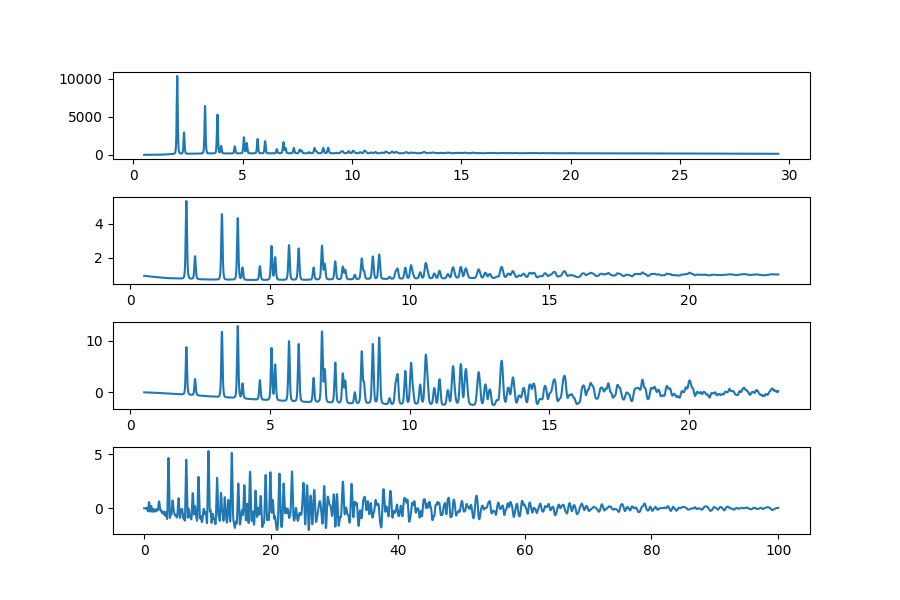

In [64]:
CeO2_left_cfg = PDFConfig(mode='xray',wavelength=0.1806, dataformat='QA', rstep=myrstep,  rmin=myfitrange[0], rmax=100,#myfitrange[1],
                     composition='Ce O',
                     backgroundfile = None, bgscale=0,
                     qmin = 0.5, qmax = 23.2, qmaxinst = 29.49, rpoly= 0.9
                    )

CeO2_left_pg0 = PDFGetter(config=CeO2_left_cfg)
CeO2_left_r0, CeO2_left_g0 = CeO2_left_pg0(filename=path+'CeO2_left_PDF.xy.qchi')
PDF_Figure(CeO2_left_pg0)

()

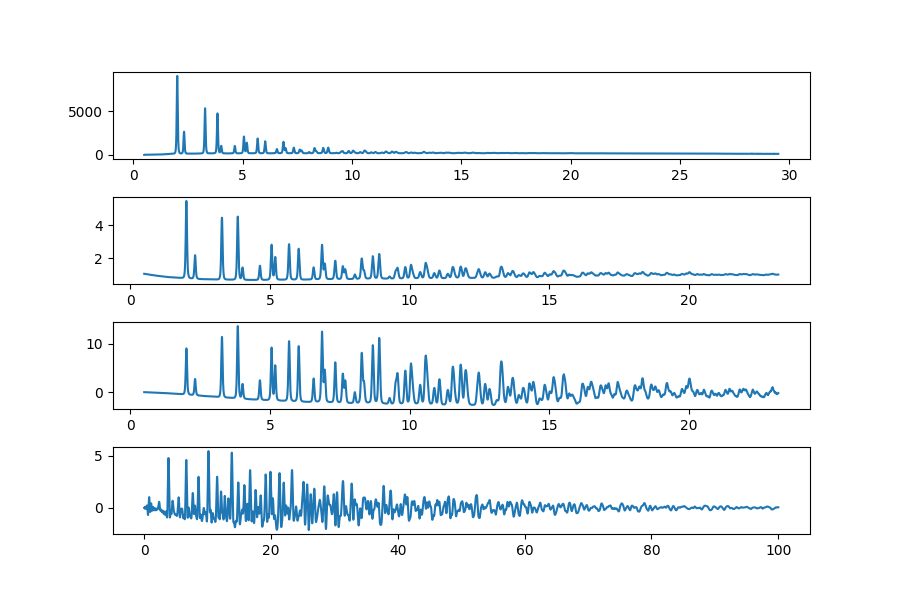

In [65]:
CeO2_right_cfg = PDFConfig(mode='xray',wavelength=0.1806, dataformat='QA', rstep=myrstep,  rmin=myfitrange[0], rmax=100,#myfitrange[1],
                     composition='Ce O',
                     backgroundfile = None, bgscale=0,
                     qmin = 0.5, qmax = 23.2, qmaxinst = 29.49, rpoly= 0.9
                    )

CeO2_right_pg0 = PDFGetter(config=CeO2_right_cfg)
CeO2_right_r0, CeO2_right_g0 = CeO2_right_pg0(filename=path+'CeO2_right_PDF.xy.qchi')
PDF_Figure(CeO2_right_pg0)

In [66]:
gr_out(CeO2_left_pg0, path=path, name='CeO2_left')
gr_out(CeO2_right_pg0, path=path, name='CeO2_right')

()